# Naive Bayes

## Importing the libraries

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn import metrics
from pprint import pprint
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the dataset

### First way

In [2]:
data_20newsgroups = fetch_20newsgroups(subset='all', categories=None, shuffle=True, 
                                       random_state=42, remove=('headers', 'footers', 'quotes'))

data_20newsgroups_train = fetch_20newsgroups(subset='train', categories=None, shuffle=True, 
                                       random_state=42, remove=('headers', 'footers', 'quotes'))

data_20newsgroups_test = fetch_20newsgroups(subset='test', categories=None, shuffle=True, 
                                       random_state=42, remove=('headers', 'footers', 'quotes'))

print('The length of texts are:', len(data_20newsgroups.data))
print('The length of lables are:', len(data_20newsgroups.target))

The length of texts are: 18846
The length of lables are: 18846


In [3]:
print('The name of folders in 20_newsgroups dataset:')
data_20newsgroups.target_names

The name of folders in 20_newsgroups dataset:


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### Second way

In [4]:
Data = '20_newsgroups'

In [5]:
# list of categories names
categories = []
for i in listdir(Data):
    categories.append(i)
    
# list of all files in different categories
files = []
for names in categories:
    path = join(Data, names)
    files.append([j for j in listdir(path)])

# list of datas of all the documents
data = []
for fo in range(len(categories)):
    for fi in files[fo]:
        data.append(join(Data, join(categories[fo], fi)))

# classes of each documents        
target = []
for names in categories:
    path = join(Data, names)
    num_of_files= len(listdir(path))
    for i in range(num_of_files):
        target.append(names)

In [6]:
print('The name of folders in 20_newsgroups dataset:')
categories

The name of folders in 20_newsgroups dataset:


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

# Split the data

In [7]:
# X = data_20newsgroups.data
# Y = data_20newsgroups.target
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_20newsgroups.data, data_20newsgroups.target, test_size = 0.3, train_size = 0.7)

In [8]:
# X = data
# Y = target
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, train_size = 0.7)

In [9]:
print('The length of texts in scikitlearn-dataset are:', len(data_20newsgroups.data))
print('The length of lables in scikitlearn-dataset are:', len(data_20newsgroups.target))

print('The length of texts in uci-dataset are:', len(data))
print('The length of lables in uci-dataset are:', len(target))

The length of texts in scikitlearn-dataset are: 18846
The length of lables in scikitlearn-dataset are: 18846
The length of texts in uci-dataset are: 19997
The length of lables in uci-dataset are: 19997


## PreProcessing

#### Remove punctuation, numbers, email and IP addresses. and convert letters to lowercase

In [10]:
df = pd.DataFrame(data_20newsgroups.data)

    
#remove punctuation Using regex
df[0] = df[0].str.replace('[^\w\s]','')

#Convert all letters to lowercase
df[0] = df[0].str.lower()

#remove numbers 
df[0] = df[0].replace('\d', '', regex=True)

#remove emails
df[0] = df[0].replace("([a-z0-9!#$%&'*+\/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+\/=?^_`"
                      "{|}~-]+)*(@|\sat\s)(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?(\.|"
                      "\sdot\s))+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?)", '', regex=True)

#remove IP address
df[0] = df[0].replace('(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})', '', regex=True)


del df

## Notice:
#### Next 3 blocks are done entirely with the help of this github repository: https://github.com/gokriznastic/20-newsgroups_text-classification

### Preprocessing function

In [11]:
stopwords = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours' 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that',"that's", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", "they'll", "they're", "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', "wasn't", 'we', "we'd",  "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where', "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's",'will', 'with', "won't", 'would', "wouldn't", 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'hundred', 'thousand', '1st', '2nd', '3rd','4th', '5th', '6th', '7th', '8th', '9th', '10th']

#preprocess the words list to remove punctuations
def preprocess(words):
    #filter out some  unnecessary data like tabs
    table = str.maketrans('', '', '\t')
    words = [word.translate(table) for word in words]
    
    punctuations = (string.punctuation).replace("'", "") 
    # the character: ' 
    trans_table = str.maketrans('', '', punctuations)
    stripped_words = [word.translate(trans_table) for word in words]
    
    #remove white spaces
    words = [str for str in stripped_words if str]
    
    #unquote the quoted words
    p_words = []
    for word in words:
        if (word[0] and word[len(word)-1] == "'"):
            word = word[1:len(word)-1]
        elif(word[0] == "'"):
            word = word[1:len(word)]
        else:
            word = word
        p_words.append(word)
    
    words = p_words.copy()
        
    #remove just-numeric strings
    words = [word for word in words if not word.isdigit()]
    
    #remove single character strings
    words = [word for word in words if not len(word) == 1]
    
    #remove blank strings
    words = [str for str in words if str]
    
    #normalize the cases of our words
    words = [word.lower() for word in words]
    
    #remove words with only 2 characters
    words = [word for word in words if len(word) > 2]
    
    return words

#remove stopwords
def remove_stopwords(words):
    words = [word for word in words if not word in stopwords]
    return words

#convert a sentence into list of words
def tokenize_sentence(line):
    words = line[0:len(line)-1].strip().split(" ")
    words = preprocess(words)
    words = remove_stopwords(words)
    return words

#remove metadata
def remove_metadata(lines):
    for i in range(len(lines)):
        if(lines[i] == '\n'):
            start = i+1
            break
    new_lines = lines[start:]
    return new_lines

#convert a document into list of words
def tokenize(path):
    #load document as a list of lines
    f = open(path, 'r')
    text_lines = f.readlines()
    
    #removing the meta-data at the top of each document
    text_lines = remove_metadata(text_lines)
    
    #initiazing an array to hold all the words in a document
    doc_words = []
    
    #traverse over all the lines and tokenize each one with the help of helper function: tokenize_sentence
    for line in text_lines:
        doc_words.append(tokenize_sentence(line))

    return doc_words

# convert a 2D array to 1D, without using numpy
def flatten(list):
    new_list = []
    for i in list:
        for j in i:
            new_list.append(j)
    return new_list

### Making train data

In [12]:
list_of_words = []

for document in data:
        list_of_words.append(flatten(tokenize(document)))
        
np_list_of_words = np.asarray(flatten(list_of_words))

#finding the number of unique words that we have extracted from the documents
words, counts = np.unique(np_list_of_words, return_counts=True)
len(words)

#sorting the unique words according to their frequency
freq, wrds = (list(i) for i in zip(*(sorted(zip(counts, words), reverse=True))))

f_o_w = []
n_o_w = []
for f in sorted(np.unique(freq), reverse=True):
    f_o_w.append(f)
    n_o_w.append(freq.count(f))
    
    
#deciding the no. of words to use as feature
n = 5000
features = wrds[0:n]

#creating a dictionary that contains each document's vocabulary and ocurence of each word of the vocabulary 
dictionary = {}
doc_num = 1
for doc_words in list_of_words:
    #print(doc_words)
    np_doc_words = np.asarray(doc_words)
    w, c = np.unique(np_doc_words, return_counts=True)
    dictionary[doc_num] = {}
    for i in range(len(w)):
        dictionary[doc_num][w[i]] = c[i]
    doc_num = doc_num + 1
    
#now we make a 2D array having the frequency of each word of our feature set in each individual documents
X_train = []
for k in dictionary.keys():
    row = []
    for f in features:
        if(f in dictionary[k].keys()):
            #if word f is present in the dictionary of the document as a key, its value is copied
            #this gives us no. of occurences
            row.append(dictionary[k][f]) 
        else:
            #if not present, the no. of occurences is zero
            row.append(0)
    X_train.append(row)
    
#we convert the X and Y into np array for concatenation and conversion into dataframe
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

### Making  test data

In [13]:
list_of_words_test = []

for document in X_test:
        list_of_words_test.append(flatten(tokenize(document)))
        
dictionary_test = {}
doc_num = 1
for doc_words in list_of_words_test:
    #print(doc_words)
    np_doc_words = np.asarray(doc_words)
    w, c = np.unique(np_doc_words, return_counts=True)
    dictionary_test[doc_num] = {}
    for i in range(len(w)):
        dictionary_test[doc_num][w[i]] = c[i]
    doc_num = doc_num + 1
    
#now we make a 2D array having the frequency of each word of our feature set in each individual documents
X_test = []
for k in dictionary_test.keys():
    row = []
    for f in features:
        if(f in dictionary_test[k].keys()):
            #if word f is present in the dictionary of the document as a key, its value is copied
            #this gives us no. of occurences
            row.append(dictionary_test[k][f]) 
        else:
            #if not present, the no. of occurences is zero
            row.append(0)
    X_test.append(row)
    
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

## There are two ways for Training a classifier

## First:
### Tokenizing text with scikit-learn and then training a classifier
#### Text preprocessing, tokenizing and filtering of stopwords are all included in CountVectorizer, which builds a dictionary of features and transforms documents to feature vectors:
## With restrictions:

In [14]:
# Ignore terms that have a document frequency strictly lower than the given threshold (200)
count_vect = CountVectorizer(min_df = 200)
X_train_counts = count_vect.fit_transform(X_train1)
X_test_counts = count_vect.transform(X_test1)

X_train_counts.shape, X_test_counts.shape

((13192, 870), (5654, 870))

In [15]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

X_train_tfidf.shape, X_test_tfidf.shape

((13192, 870), (5654, 870))

In [16]:
# naive bayes classifier provides a nice baseline
# Here .toarray() with X_train is used to convert a sparse matrix to a dense matrix.

clf = MultinomialNB()
clf.fit(X_train_tfidf.toarray(), y_train1)

clf_predicted = clf.predict(X_test_tfidf.toarray())
np.mean(clf_predicted == y_test1)

0.492041032897064

## Without restrictions

In [17]:
# Ignore terms that have a document frequency strictly lower than the given threshold (200)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train1)
X_test_counts = count_vect.transform(X_test1)

X_train_counts.shape, X_test_counts.shape

((13192, 111344), (5654, 111344))

In [18]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

X_train_tfidf.shape, X_test_tfidf.shape

((13192, 111344), (5654, 111344))

In [19]:
# naive bayes classifier provides a nice baseline
# Here .toarray() with X_train is used to convert a sparse matrix to a dense matrix.

clf = MultinomialNB()
clf.fit(X_train_tfidf.toarray(), y_train1)

clf_predicted = clf.predict(X_test_tfidf.toarray())
np.mean(clf_predicted == y_test1)

0.6508666430845419

## Second:
### Provides a Pipeline class that behaves like a compound classifier

In [20]:
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB()),])
text_clf.fit(X_train1, y_train1)

predicted = text_clf.predict(X_test1)
np.mean(predicted == y_test1)

0.6508666430845419

In [21]:
print(metrics.classification_report(y_test1, predicted, target_names=data_20newsgroups_test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.78      0.07      0.14       282
           comp.graphics       0.73      0.60      0.66       305
 comp.os.ms-windows.misc       0.76      0.56      0.65       302
comp.sys.ibm.pc.hardware       0.33      0.85      0.47       255
   comp.sys.mac.hardware       0.92      0.55      0.69       295
          comp.windows.x       0.77      0.80      0.78       267
            misc.forsale       0.87      0.69      0.77       288
               rec.autos       0.88      0.68      0.77       309
         rec.motorcycles       0.93      0.67      0.78       308
      rec.sport.baseball       0.94      0.78      0.85       294
        rec.sport.hockey       0.84      0.89      0.86       278
               sci.crypt       0.76      0.83      0.79       322
         sci.electronics       0.85      0.58      0.69       291
                 sci.med       0.83      0.83      0.83       275
         

In [22]:
cm = confusion_matrix(y_test1, predicted)
print(cm)

[[ 21   1   1   7   0   2   0   0   1   1   2   3   0   3   5 212   3  20
    0   0]
 [  0 183   9  45   3  22   2   0   1   0   4   4   1   4   3  22   0   2
    0   0]
 [  0  10 169  67   1  24   1   1   0   0   0  11   2   2   0  13   0   1
    0   0]
 [  0   4  18 218   0   1   3   0   0   0   1   1   3   1   0   4   1   0
    0   0]
 [  0   2   7  91 163   1   5   1   1   0   0   5   7   1   0   9   2   0
    0   0]
 [  0  16   8  12   0 214   1   1   0   1   0   1   1   2   2   8   0   0
    0   0]
 [  0   5   1  40   6   1 199   2   1   3   3   2   6   2   4  10   3   0
    0   0]
 [  0   2   0  26   0   2   4 210   6   1   4   2   5   3   3  30   7   4
    0   0]
 [  0   2   1  11   0   4   8  13 205   2   6   2   1   3   2  38   8   2
    0   0]
 [  1   5   0   7   0   1   1   1   1 230  11   0   0   1   0  32   2   1
    0   0]
 [  0   0   0  11   0   0   0   2   0   0 248   3   0   1   0  13   0   0
    0   0]
 [  0   3   2  11   0   1   1   0   1   0   2 266   2   2   3  22

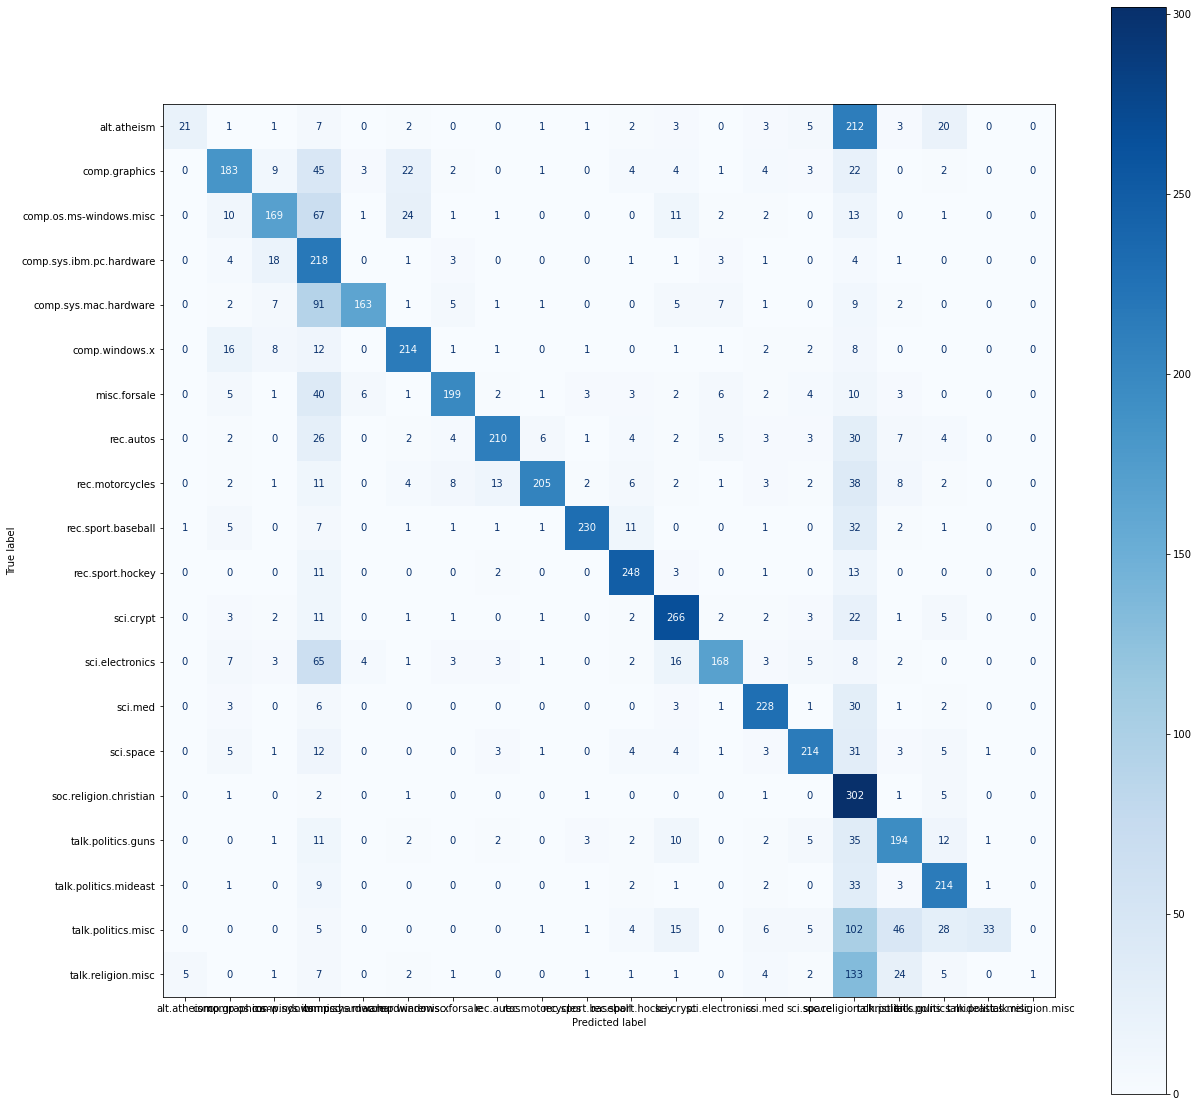

In [23]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(text_clf, X_test1, y_test1, display_labels= data_20newsgroups_test.target_names , cmap=plt.cm.Blues, ax = ax)

<AxesSubplot:>

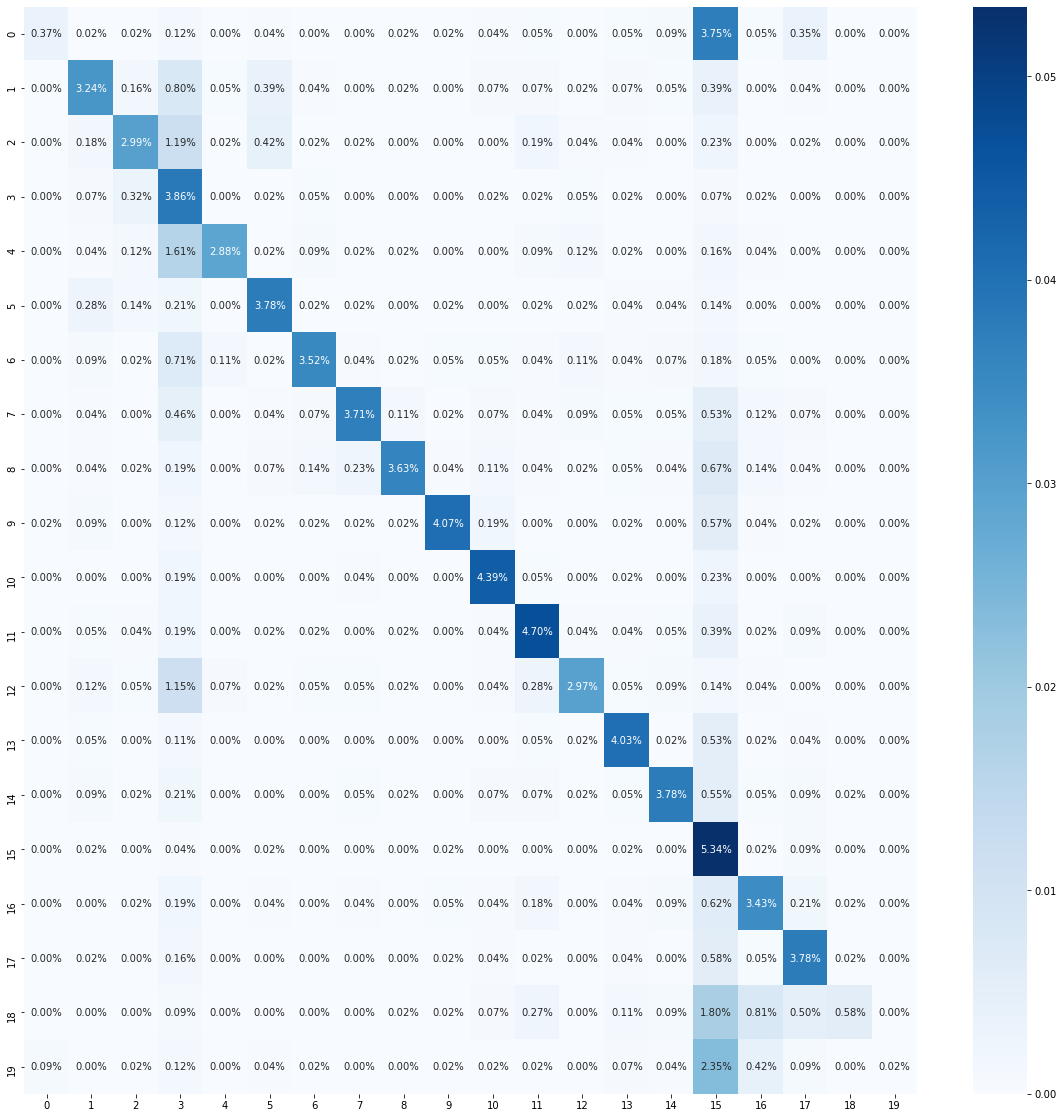

In [24]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues', ax = ax)